In [4]:
# "conda python 3.10.14"
# -*- coding: utf-8 -*-
import matplotlib
# 设置字体参数
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 空气中铅(Pb)的测定

## 目录

- [实验数据](#实验数据)
- [init data](#init-data)
- [计算回归方程](#计算回归方程)
  - [其他参数](#其他参数)
- [相关资料](#相关资料)
  - [国标](#国标)
  - [learn 吸光度](#learn-吸光度)


## 实验数据

$$
\hspace{1cm} C = \frac{V_t \cdot C_0}{V_0} \hspace{9cm}
$$

式中:
$$
\begin{array}{ll}
C & \text{-----} \text{空气中铅的浓度，}mg/m^3 \\
V_t & \text{-----} \text{样品溶液的体积，}ml \\
C_0 & \text{-----} \text{测得的样品溶液中铅的浓度(减去样品空白)，}\mu g/ml \\
V_0 & \text{-----} \text{标准采样体积，L} \\
\end{array}
$$

**标准系列**

|                |   0    |   1    |   2    |   3    |   4    |   5    |
|:---------------|:------:|:------:|:------:|:------:|:------:|:------:|
| 浓度 C ($\mu g/ml$) |   0    |   2    |   4    |   6    |   8    |   10   |
| 吸光度 A       | 0.0001 | 0.0363 | 0.0716 | 0.1002 | 0.1377 | 0.1702 |

测得的样品吸光度:

$$
A_0 = 0.0088
$$

## init data

并打印表格

In [2]:
import numpy as np

# 标准系列
# 吸光度 A
a_x = np.array([0.0001, 0.0363, 0.0716, 0.1002, 0.1377, 0.1702])
# 浓度 ug/ml
c_y = np.array([0, 2, 4, 6, 8, 10])
# 样品 吸光度 A
a_0 = 0.0088

# 绘制表格
import pandas as pd
# 创建一个数据框
df = pd.DataFrame({'浓度 C ' + r'$(\mu g/ml)$': c_y, '吸光度 A': a_x})
# 打印数据框
df_T = df.T
# print(df_T)
# 使用pandas生成HTML表格
# print(df_T.to_html())
from IPython.display import display, HTML, Math, Markdown
# 使用display函数显示HTML表格
# display(HTML(df_T.to_html()))
display(Markdown(df_T.to_markdown()))

# 使用tabulate打印居中对齐的表格
from tabulate import tabulate
# print(tabulate(df_T, headers='keys', tablefmt='psql', showindex=True, numalign="center"))
# print(tabulate(df_T, headers='keys', tablefmt='pipe', showindex=True, numalign="center"))

|                     |      0 |      1 |      2 |      3 |      4 |       5 |
|:--------------------|-------:|-------:|-------:|-------:|-------:|--------:|
| 浓度 C $(\mu g/ml)$ | 0      | 2      | 4      | 6      | 8      | 10      |
| 吸光度 A            | 0.0001 | 0.0363 | 0.0716 | 0.1002 | 0.1377 |  0.1702 |

## 计算回归方程

并预测吸光度为0.0088时的浓度

预测的样品浓度为：0.4361375218662065 ug/ml


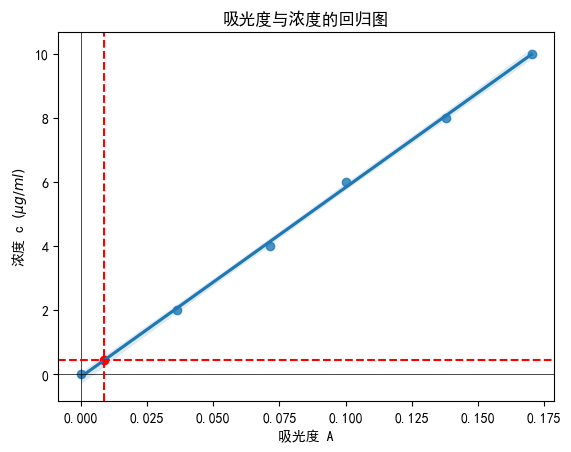

回归方程为：y = 59.1046295463043x + -0.08398321814127135


In [5]:
# 计算回归方程 y = kx + b
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 使用seaborn的regplot函数来绘制回归图
sns.regplot(x=a_x, y=c_y)

# 添加y=0和x=0的线
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
# 设置坐标轴的标签和图的标题
plt.xlabel('吸光度 A')
plt.ylabel('浓度 c ' + r'$(\mu g/ml)$')
plt.title('吸光度与浓度的回归图')

# 使用numpy的polyfit函数来拟合数据
coefficients = np.polyfit(a_x, c_y, 1)
polynomial = np.poly1d(coefficients)
# 使用拟合的模型来预测样品的浓度
c_0 = polynomial(a_0)
# 添加特殊标记
# plt.annotate('c_0', xy=(a_0, c_0), xytext=(a_0, c_0 + 2),
#              arrowprops=dict(facecolor='black', shrink=0.05))
# 添加特殊的点
plt.scatter(a_0, c_0, color='red')
# 添加虚线的垂直线
plt.axvline(a_0, color='red', linestyle='--')
plt.axhline(c_0, color='red', linestyle='--')

print(f"预测的样品浓度为：{c_0} ug/ml")
plt.show()
print(f"回归方程为：y = {coefficients[0]}x + {coefficients[1]}")

### 其他参数

In [38]:
# 计算每个点的预测值
y_pred = polynomial(a_x)
# 计算每个点的误差
errors = y_pred - c_y
# 计算总误差
total_error = np.sum(np.abs(errors))
# 计算相关度（Pearson correlation coefficient）
correlation, _ = stats.pearsonr(a_x, c_y)
# 计算R²（决定系数）
r_squared = np.corrcoef(c_y, y_pred)[0, 1]**2
# 打印结果
print(f"每个点的误差为：{errors}")
print(f"总误差为：{total_error}")
print(f"相关度为：{correlation}")
print(f"决定系数 R² 为：{r_squared}")
# 创建一个数据框来显示结果
df = pd.DataFrame({
    '吸光度 A': a_x,
    '浓度 ug/ml': c_y,
    '预测浓度': y_pred,
    '误差': errors
})
df.T

每个点的误差为：[-0.07807276  0.06151483  0.14790826 -0.16169934  0.05472427 -0.02437527]
总误差为：0.5282947242970231
相关度为：0.9995606759410557
决定系数 R² 为：0.9991215448877406


,0,1,2,3,4,5
吸光度 A,0.000100,0.036300,0.071600,0.100200,0.137700,0.170200
浓度 ug/ml,0.000000,2.000000,4.000000,6.000000,8.000000,10.000000
预测浓度,-0.078073,2.061515,4.147908,5.838301,8.054724,9.975625
误差,-0.078073,0.061515,0.147908,-0.161699,0.054724,-0.024375


In [39]:
0.4361375218662065*10/(5*15)

0.05815166958216087

$$
C_0 = 0.4361375218662065 \, \mu g/ml \\ \quad \\
\begin{align*}
C &= \frac{10 \cdot C_0}{5 \cdot 15} \\
&= 0.05815166958216087 \, mg/m^3 \\
&= 58.15166958216087
\, \mu g/m^3
\end{align*}
$$

$$
% \hspace{1cm} 
超过了国标的 0.5 \mu g/m^3 \hspace{1.5cm} 
% \hspace{99cm}
$$

## 相关资料

### 国标

0.5 $\mu g/m^3$

### learn 吸光度

吸光度通常用希腊字母 "A"（表示 "Absorbance"）表示，或者用 "OD"（表示 "Optical Density"）。在一些文献中，你也可能看到用 "E"（表示 "Extinction"）表示吸光度。

吸光度（Absorbance）通常没有单位，因为它是一个比值，是透射光强度和入射光强度的对数比。在实际应用中，你可能会看到吸光度值前面有一个单位“AU”（Absorbance Units），但这只是为了强调这是一个吸光度值，实际上吸光度是没有单位的。